In [ ]:
# Downloading Dataset from Kaggle
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset
License(s): CC0-1.0
 95% 315M/330M [00:02<00:00, 118MB/s]
100% 330M/330M [00:02<00:00, 116MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/face-mask-12k-images-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/FaceMaskDataset/Train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/FaceMaskDataset/Validation',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256, 256)
)

Found 10000 files belonging to 2 classes.
Found 800 files belonging to 2 classes.


In [ ]:
def process(image, label):
  image = tf.cast(image/255. ,tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

train_ds = train_ds.map(lambda x, y: (tf.image.random_flip_left_right(x), y))

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 142ms/step - accuracy: 0.9275 - loss: 1.5736 - val_accuracy: 0.6150 - val_loss: 9.2235
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 114ms/step - accuracy: 0.9738 - loss: 0.3788 - val_accuracy: 0.9400 - val_loss: 0.4802
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 110ms/step - accuracy: 0.9763 - loss: 0.2426 - val_accuracy: 0.9800 - val_loss: 0.1411
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.9834 - loss: 0.1317 - val_accuracy: 0.8625 - val_loss: 0.6045
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 109ms/step - accuracy: 0.9869 - loss: 0.0945 - val_accuracy: 0.8850 - val_loss: 1.1793
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 112ms/step - accuracy: 0.9831 - loss: 0.0955 - val_accuracy: 0.9887 - val_loss: 0.0455
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 110ms/step - accuracy: 0.9908 - loss: 0.0296 - val_accuracy: 0.9937 - val_loss: 0.0327
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 107ms/step - accuracy: 0.9925 - loss: 0

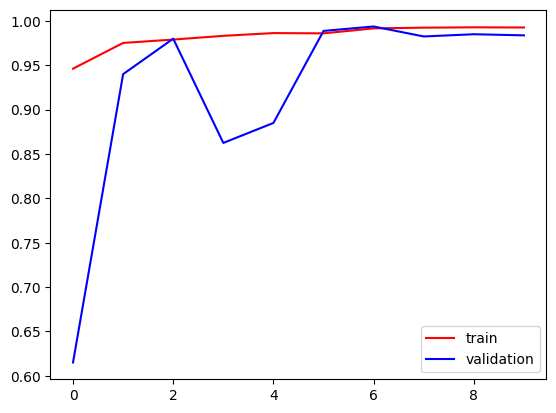

In [ ]:
import matplotlib.pyplot as Plt
Plt.plot(history.history['accuracy'], color='red', label='train')
Plt.plot(history.history['val_accuracy'], color='blue', label='validation')
Plt.legend()
Plt.show()

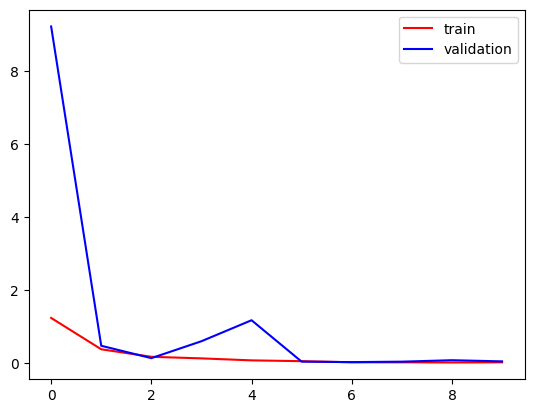

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [ ]:
model.save('/content/face_mask.h5')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the saved model
model = load_model('face_mask.h5')

# Function to load and preprocess the image
def load_and_preprocess_image(image_path, target_size=(256, 256)):
    # Load the image
    img = load_img(image_path, target_size=target_size)
    # Convert the image to an array
    img_array = img_to_array(img)
    # Normalize the image data
    img_array = img_array / 255.0
    # Expand dimensions to match the model input shape
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Function to make a prediction and display the result
def predict_and_display(image_path):
    # Load and preprocess the image
    img_array = load_and_preprocess_image(image_path)
    # Make a prediction
    prediction = model.predict(img_array)
    # Get the class label
    predicted_class = np.argmax(prediction, axis=1)[0]
    class_labels = ['with_mask', 'without_mask']
    predicted_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.imshow(load_img(image_path))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Test the model on a single image
image_path = '/content/mask.jpeg'
predict_and_display(image_path)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'face_mask.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)